#Qiskit 31 -
4 server 7 vm

In [1]:
!pip install Qiskit ipywidgets
!pip install qiskit
!pip install qiskit_optimization
!pip install qiskit-optimization
!pip install cplex
!pip install ibm-quantum-widgets
!pip install docplex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 27.2 MB/s 
     |████████████████████████████████| 19.2 MB 11.8 MB/s 
     |████████████████████████████████| 240 kB 22.4 MB/s 
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 112 kB 46.2 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 
     |████████████████████████████████| 49 kB 6.6 MB/s 
     |████████████████████████████████| 943 kB 44.7 MB/s 
     |████████████████████████████████| 4.0 MB 12.4 MB/s 
     |████████████████████████████████| 1.9 MB 27.8 MB/s 
     |████████████████████████████████| 112 kB 64.5 MB/s 
     |████████████████████████████████| 1.6 MB 44.9 MB/s 
  Created wheel for Qiskit: filename=qiskit-0.39.0-py3-none-any.whl size=12188 sha256=6d3c41465eb450556374a5e85d0b5ecef14fde7bb320ce9db25c93280af0ab08
 

In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

In [3]:
import time
from typing import List, Optional, Any
import numpy as np
import matplotlib.pyplot as plt

from docplex.mp.model import Model

from qiskit import BasicAer
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import CobylaOptimizer, MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.algorithms.admm_optimizer import ADMMParameters, ADMMOptimizer
from qiskit_optimization.translators import from_docplex_mp

from qiskit.utils.algorithm_globals import algorithm_globals
algorithm_globals.massive=True

# If CPLEX is installed, you can uncomment this line to import the CplexOptimizer.
# CPLEX can be used in this tutorial to solve the convex continuous problem,
# but also as a reference to solve the QUBO, or even the full problem.
#
# from qiskit.optimization.algorithms import CplexOptimizer

In [4]:
# define COBYLA optimizer to handle convex continuous problems.
cobyla = CobylaOptimizer()

# define QAOA via the minimum eigen optimizer
qaoa = MinimumEigenOptimizer(QAOA(quantum_instance=BasicAer.get_backend("statevector_simulator")))

# exact QUBO solver as classical benchmark
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())  # to solve QUBOs

# in case CPLEX is installed it can also be used for the convex problems, the QUBO,
# or as a benchmark for the full problem.
#
# cplex = CplexOptimizer()

In [5]:
# construct model using docplex
mdl = Model("ex25")

#server = M = 3 = i = i0, i1, i2
#virtual machine = N = 7 = j = j0, j1, j2, j3, j4, j5, j6
#all servers have the same idle and dynamic power consumption
#all servers have the same maximum cpu capacity

si0 = mdl.binary_var(name="si0")
si1 = mdl.binary_var(name="si1")
si2 = mdl.binary_var(name="si2")
si3 = mdl.binary_var(name="si3")

vj0i0 = mdl.continuous_var(name="vj0i0")
vj1i0 = mdl.continuous_var(name="vj1i0")
vj2i0 = mdl.continuous_var(name="vj2i0")
vj3i0 = mdl.continuous_var(name="vj3i0")
vj4i0 = mdl.continuous_var(name="vj4i0")
vj5i0 = mdl.continuous_var(name="vj5i0")
vj6i0 = mdl.continuous_var(name="vj6i0")

vj0i1 = mdl.continuous_var(name="vj0i1")
vj1i1 = mdl.continuous_var(name="vj1i1")
vj2i1 = mdl.continuous_var(name="vj2i1")
vj3i1 = mdl.continuous_var(name="vj3i1")
vj4i1 = mdl.continuous_var(name="vj4i1")
vj5i1 = mdl.continuous_var(name="vj5i1")
vj6i1 = mdl.continuous_var(name="vj6i1")

vj0i2 = mdl.continuous_var(name="vj0i2")
vj1i2 = mdl.continuous_var(name="vj1i2")
vj2i2 = mdl.continuous_var(name="vj2i2")
vj3i2 = mdl.continuous_var(name="vj3i2")
vj4i2 = mdl.continuous_var(name="vj4i2")
vj5i2 = mdl.continuous_var(name="vj5i2")
vj6i2 = mdl.continuous_var(name="vj6i2")

vj0i3 = mdl.continuous_var(name="vj0i3")
vj1i3 = mdl.continuous_var(name="vj1i3")
vj2i3 = mdl.continuous_var(name="vj2i3")
vj3i3 = mdl.continuous_var(name="vj3i3")
vj4i3 = mdl.continuous_var(name="vj4i3")
vj5i3 = mdl.continuous_var(name="vj5i3")
vj6i3 = mdl.continuous_var(name="vj6i3")

pi = 10
pd = 5

ci0 = 100
ci1 = 110
ci2 = 100
ci3 = 90
#ci4 = 87

uj0 = mdl.continuous_var(name="uj0")
uj1 = mdl.continuous_var(name="uj1")
uj2 = mdl.continuous_var(name="uj2")
uj3 = mdl.continuous_var(name="uj3")
uj4 = mdl.continuous_var(name="uj4")
uj5 = mdl.continuous_var(name="uj5")
uj6 = mdl.continuous_var(name="uj6")

sum0 = (vj0i0+vj1i0+vj2i0+vj3i0+vj4i0+vj5i0+vj6i0)
sum1 = (vj0i1+vj1i1+vj2i1+vj3i1+vj4i1+vj5i1+vj6i1)
sum2 = (vj0i2+vj1i2+vj2i2+vj3i2+vj4i2+vj5i2+vj6i2)
sum3 = (vj0i3+vj1i3+vj2i3+vj3i3+vj4i3+vj5i3+vj6i3)

mdl.minimize(pi*si0+pd*(sum0)+pi*si1+pd*uj1*(sum1)+pi*si2+pd*(sum2)+pi*si3+pd*(sum3))#+pi*si4+pd*(sum4))

mdl.add_constraint((vj0i0+vj1i0+vj2i0+vj3i0+vj4i0+vj5i0) >= 0.9, "cons5")
mdl.add_constraint((vj0i1+vj1i1+vj2i1+vj3i1+vj4i1+vj5i1) >= 0.9, "cons6")
mdl.add_constraint((vj0i2+vj1i2+vj2i2+vj3i2+vj4i2+vj5i2) >= 0.9, "cons7")
mdl.add_constraint((vj0i3+vj1i3+vj2i3+vj3i3+vj4i3+vj5i3) >= 0.9, "cons8")
#mdl.add_constraint((vj0i4+vj1i4+vj2i4+vj3i4+vj4i4+vj5i4) >= 0.9, "cons9")

mdl.add_constraint((vj0i0+vj1i0+vj2i0+vj3i0+vj4i0+vj5i0) <= 0.99,"cons10")
mdl.add_constraint((vj0i1+vj1i1+vj2i1+vj3i1+vj4i1+vj5i1) <= 0.99, "cons11")
mdl.add_constraint((vj0i2+vj1i2+vj2i2+vj3i2+vj4i2+vj5i2) <= 0.99, "cons12")
mdl.add_constraint((vj0i3+vj1i3+vj2i3+vj3i3+vj4i3+vj5i3) <= 0.99, "cons13")
#mdl.add_constraint((vj0i4+vj1i4+vj2i4+vj3i4+vj4i4+vj5i4) <= 0.99, "cons14")

docplex.mp.LinearConstraint[cons13](vj0i3+vj1i3+vj2i3+vj3i3+vj4i3+vj5i3,LE,0.99)

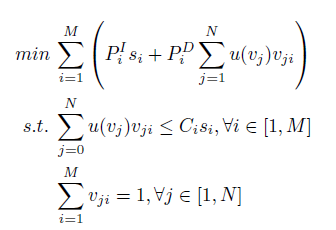

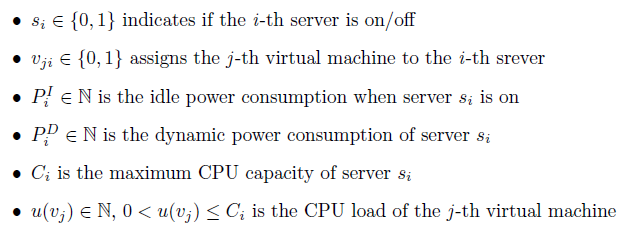

In [6]:
# load quadratic program from docplex model
qp = from_docplex_mp(mdl)
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: ex25

Minimize
 obj: 10 si0 + 10 si1 + 10 si2 + 10 si3 + 5 vj0i0 + 5 vj1i0 + 5 vj2i0 + 5 vj3i0
      + 5 vj4i0 + 5 vj5i0 + 5 vj6i0 + 5 vj0i2 + 5 vj1i2 + 5 vj2i2 + 5 vj3i2
      + 5 vj4i2 + 5 vj5i2 + 5 vj6i2 + 5 vj0i3 + 5 vj1i3 + 5 vj2i3 + 5 vj3i3
      + 5 vj4i3 + 5 vj5i3 + 5 vj6i3 + [ 10 vj0i1*uj1 + 10 vj1i1*uj1
      + 10 vj2i1*uj1 + 10 vj3i1*uj1 + 10 vj4i1*uj1 + 10 vj5i1*uj1 + 10 vj6i1*uj1
      ]/2
Subject To
 cons5: vj0i0 + vj1i0 + vj2i0 + vj3i0 + vj4i0 + vj5i0 >= 0.900000000000
 cons6: vj0i1 + vj1i1 + vj2i1 + vj3i1 + vj4i1 + vj5i1 >= 0.900000000000
 cons7: vj0i2 + vj1i2 + vj2i2 + vj3i2 + vj4i2 + vj5i2 >= 0.900000000000
 cons8: vj0i3 + vj1i3 + vj2i3 + vj3i3 + vj4i3 + vj5i3 >= 0.900000000000
 cons10: vj0i0 + vj1i0 + vj2i0 + vj3i0 + vj4i0 + vj5i0 <= 0.990000000000
 cons11: vj0i1 + vj1i1 + vj2i1 + vj3i1 + vj4i1 + vj5i1 <= 0.990000000000
 cons12: vj0i2 + vj1i2 + vj2i2 + vj3i2 + vj4i2 + vj5i2 <= 0.9900000000

In [7]:
admm_params = ADMMParameters(
                            rho_initial=1001,
                            beta=1000,
                            factor_c=900,
                            maxiter=100,
                            three_block=True, tol=1.e-6
                        )

In [8]:
# define QUBO optimizer
qubo_optimizer = exact
# qubo_optimizer = cplex  # uncomment to use CPLEX instead

# define classical optimizer
convex_optimizer = cobyla
# convex_optimizer = cplex  # uncomment to use CPLEX instead

# initialize ADMM with classical QUBO and convex optimizer
admm = ADMMOptimizer(params=admm_params,
                     qubo_optimizer=qubo_optimizer,
                     continuous_optimizer=convex_optimizer,
                    )

In [9]:
# run ADMM to solve problem
#%tb
%timeit
result = admm.solve(qp)

In [10]:
print(result.prettyprint())

objective function value: 13.500000000000002
variable values: si0=0.0, si1=0.0, si2=0.0, si3=0.0, vj0i0=0.14022957259429342, vj1i0=0.14099580759190963, vj2i0=0.16703474339782756, vj3i0=0.1536095715732708, vj4i0=0.14920869341719406, vj5i0=0.14892161142550484, vj6i0=1.6266119639883745e-17, vj0i1=0.1464966607010258, vj1i1=0.14770955567143362, vj2i1=0.1557538940427177, vj3i1=0.1461564519664136, vj4i1=0.15476717209570212, vj5i1=0.1491162655227074, vj6i1=0.00033548493725544073, vj0i2=0.1522301204478689, vj1i2=0.15400962771414517, vj2i2=0.15429168037653182, vj3i2=0.1534201106667775, vj4i2=0.13317705744071587, vj5i2=0.15287140335396082, vj6i2=-7.648388399815972e-17, vj0i3=0.15134483558017367, vj1i3=0.14207576627718788, vj2i3=0.15031110138547016, vj3i3=0.1464078341893078, vj4i3=0.1486478179929744, vj5i3=0.16121264457488638, vj6i3=-1.0867692701094807e-16, uj0=0.0008139123438688081, uj1=-1.2725263488617814e-17, uj2=0.00710302874578092, uj3=0.00913661641997138, uj4=0.0009019587330334691, uj5=6.295

In [11]:
print(f"vj0i0=0.15988037322319204, vj1i0=0.1592783639309958, vj2i0=0.15397710953440666, vj3i0=0.1422468181865395, vj4i0=0.14161315601833316, vj5i0=0.14300417910653285, vj0i1=0.143411829755138, vj1i1=0.14815798074821926, vj2i1=0.14400882787249072, vj3i1=0.15901561802342695, vj4i1=0.143180417308469, vj5i1=0.18169011700287835, vj0i2=0.10024080365461123, vj1i2=0.16360658696514446, vj2i2=0.15406667049554743, vj3i2=0.15149300252757658, vj4i2=0.16717509033047503, vj5i2=0.16341784602664536, vj0i3=0.1394090149124219, vj1i3=0.1403360814903161, vj2i3=0.15421725005957174, vj3i3=0.15585562375143788, vj4i3=0.15256916203236784, vj5i3=0.15761286775388475, uj0=0.015922180033772635, uj1=2.095541242953076e-19, uj2=0.001485571839640591, uj3=0.0074349457401025375, uj4=0.008446278672485014, uj5=0.0006178212708987581")

vj0i0=0.15988037322319204, vj1i0=0.1592783639309958, vj2i0=0.15397710953440666, vj3i0=0.1422468181865395, vj4i0=0.14161315601833316, vj5i0=0.14300417910653285, vj0i1=0.143411829755138, vj1i1=0.14815798074821926, vj2i1=0.14400882787249072, vj3i1=0.15901561802342695, vj4i1=0.143180417308469, vj5i1=0.18169011700287835, vj0i2=0.10024080365461123, vj1i2=0.16360658696514446, vj2i2=0.15406667049554743, vj3i2=0.15149300252757658, vj4i2=0.16717509033047503, vj5i2=0.16341784602664536, vj0i3=0.1394090149124219, vj1i3=0.1403360814903161, vj2i3=0.15421725005957174, vj3i3=0.15585562375143788, vj4i3=0.15256916203236784, vj5i3=0.15761286775388475, uj0=0.015922180033772635, uj1=2.095541242953076e-19, uj2=0.001485571839640591, uj3=0.0074349457401025375, uj4=0.008446278672485014, uj5=0.0006178212708987581


In [12]:
vj0i0_sol=0.15988037322319204
vj1i0_sol=0.1592783639309958
vj2i0_sol=0.15397710953440666
vj3i0_sol=0.1422468181865395
vj4i0_sol=0.14161315601833316
vj5i0_sol=0.14300417910653285

vj0i1_sol=0.143411829755138
vj1i1_sol=0.14815798074821926
vj2i1_sol=0.14400882787249072
vj3i1_sol=0.15901561802342695
vj4i1_sol=0.143180417308469
vj5i1_sol=0.18169011700287835

vj0i2_sol=0.10024080365461123
vj1i2_sol=0.16360658696514446
vj2i2_sol=0.15406667049554743
vj3i2_sol=0.15149300252757658
vj4i2_sol=0.16717509033047503
vj5i2_sol=0.16341784602664536

vj0i3_sol=0.1394090149124219
vj1i3_sol=0.1403360814903161
vj2i3_sol=0.15421725005957174
vj3i3_sol=0.15585562375143788
vj4i3_sol=0.15256916203236784
vj5i3_sol=0.15761286775388475

uj0_sol=0.015922180033772635
uj1_sol=2.095541242953076e-19
uj2_sol=0.001485571839640591
uj3_sol=0.0074349457401025375
uj4_sol=0.008446278672485014
uj5_sol=0.0006178212708987581

vi0_sol=vj0i0_sol+vj1i0_sol+vj2i0_sol+vj3i0_sol+vj4i0_sol+vj5i0_sol
vi1_sol=vj0i1_sol+vj1i1_sol+vj2i1_sol+vj3i1_sol+vj4i1_sol+vj5i1_sol
vi2_sol=vj0i2_sol+vj1i2_sol+vj2i2_sol+vj3i2_sol+vj4i2_sol+vj5i2_sol
vi3_sol=vj0i3_sol+vj1i3_sol+vj2i2_sol+vj3i3_sol+vj4i3_sol+vj5i3_sol

vj0_sol=vj0i0_sol+vj0i1_sol+vj0i2_sol+vj0i3_sol
vj1_sol=vj1i0_sol+vj1i1_sol+vj1i2_sol+vj1i3_sol
vj2_sol=vj2i0_sol+vj2i1_sol+vj2i2_sol+vj2i3_sol
vj3_sol=vj3i0_sol+vj3i1_sol+vj3i2_sol+vj3i3_sol
vj4_sol=vj4i0_sol+vj4i1_sol+vj4i2_sol+vj4i3_sol
vj5_sol=vj5i0_sol+vj5i1_sol+vj5i2_sol+vj5i3_sol

print("vi0_sol = ",vi0_sol,"\nvi1_sol = ",vi1_sol,"\nvi2_sol = ",vi2_sol,"\nvi3_sol = ",vi3_sol)
print("vitot = ",vi0_sol+vi0_sol+vi1_sol+vi2_sol)
print("vj0_sol = ",vj0_sol,"\nvj1_sol = ",vj1_sol,"\nvj2_sol = ",vj2_sol,"\nvj3_sol = ",vj3_sol,"\nvj4_sol = ",vj4_sol,"\nvj5_sol = ",vj5_sol)
print("vjtot = ",vj0_sol+vj1_sol+vj2_sol+vj3_sol+vj4_sol+vj5_sol)

vi0_sol =  0.9 
vi1_sol =  0.9194647907106224 
vi2_sol =  0.9000000000000001 
vi3_sol =  0.8998494204359759
vitot =  3.619464790710623
vj0_sol =  0.5429420215453632 
vj1_sol =  0.6113790131346756 
vj2_sol =  0.6062698579620166 
vj3_sol =  0.6086110624889809 
vj4_sol =  0.604537825689645 
vj5_sol =  0.6457250098899413
vjtot =  3.6194647907106225


In [13]:
print("x={:}".format(result.x))
print("fval={:.7f}".format(result.fval))
print("x={:}".format(result.state.residuals))

x=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.40229573e-01  1.40995808e-01  1.67034743e-01  1.53609572e-01
  1.49208693e-01  1.48921611e-01  1.62661196e-17  1.46496661e-01
  1.47709556e-01  1.55753894e-01  1.46156452e-01  1.54767172e-01
  1.49116266e-01  3.35484937e-04  1.52230120e-01  1.54009628e-01
  1.54291680e-01  1.53420111e-01  1.33177057e-01  1.52871403e-01
 -7.64838840e-17  1.51344836e-01  1.42075766e-01  1.50311101e-01
  1.46407834e-01  1.48647818e-01  1.61212645e-01 -1.08676927e-16
  8.13912344e-04 -1.27252635e-17  7.10302875e-03  9.13661642e-03
  9.01958733e-04  6.29530438e-05  3.96496302e-04]
fval=13.5000000
x=[9.999999999974312e-05, 8.350182096086094e-05, 0.00016366147137613886, 0.00015027977708917455, 0.00012418224060998959, 4.4242107679932056e-05, 0.00013093886564711333, 0.0001454774766444936, 0.00017797311567944256, 0.00011885176720821551, 0.00017347548974457714, 0.00013072834266341111, 0.0001439582305088621, 0.00012881032156158116, 0.0002601863

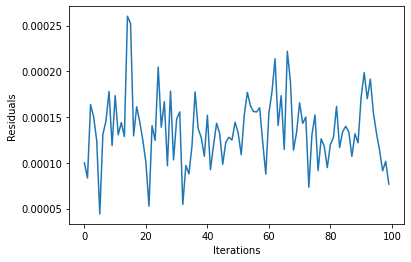

In [14]:
plt.plot(result.state.residuals)
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()

In [15]:
lista = []
lista = result.state.residuals

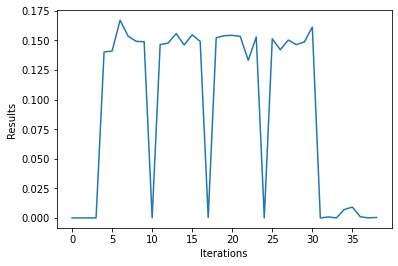

In [16]:
plt.plot(result.x)
plt.xlabel("Iterations")
plt.ylabel("Results")
plt.show()

In [17]:
#import matplotlib.pyplot as plt
#
#fig, ax = plt.subplots()
#
#f = [result.x]
#c = [40, 100, 30, 55]
#
#ax.bar(f, c,)
#
#ax.set_ylabel("Residuals")
#ax.set_title("Results")
#
#
#plt.show()

In [18]:
print(result.x)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.40229573e-01  1.40995808e-01  1.67034743e-01  1.53609572e-01
  1.49208693e-01  1.48921611e-01  1.62661196e-17  1.46496661e-01
  1.47709556e-01  1.55753894e-01  1.46156452e-01  1.54767172e-01
  1.49116266e-01  3.35484937e-04  1.52230120e-01  1.54009628e-01
  1.54291680e-01  1.53420111e-01  1.33177057e-01  1.52871403e-01
 -7.64838840e-17  1.51344836e-01  1.42075766e-01  1.50311101e-01
  1.46407834e-01  1.48647818e-01  1.61212645e-01 -1.08676927e-16
  8.13912344e-04 -1.27252635e-17  7.10302875e-03  9.13661642e-03
  9.01958733e-04  6.29530438e-05  3.96496302e-04]


In [19]:
result

<ADMMOptimizationResult: fval=13.500000000000002, si0=0.0, si1=0.0, si2=0.0, si3=0.0, vj0i0=0.14022957259429342, vj1i0=0.14099580759190963, vj2i0=0.16703474339782756, vj3i0=0.1536095715732708, vj4i0=0.14920869341719406, vj5i0=0.14892161142550484, vj6i0=1.6266119639883745e-17, vj0i1=0.1464966607010258, vj1i1=0.14770955567143362, vj2i1=0.1557538940427177, vj3i1=0.1461564519664136, vj4i1=0.15476717209570212, vj5i1=0.1491162655227074, vj6i1=0.00033548493725544073, vj0i2=0.1522301204478689, vj1i2=0.15400962771414517, vj2i2=0.15429168037653182, vj3i2=0.1534201106667775, vj4i2=0.13317705744071587, vj5i2=0.15287140335396082, vj6i2=-7.648388399815972e-17, vj0i3=0.15134483558017367, vj1i3=0.14207576627718788, vj2i3=0.15031110138547016, vj3i3=0.1464078341893078, vj4i3=0.1486478179929744, vj5i3=0.16121264457488638, vj6i3=-1.0867692701094807e-16, uj0=0.0008139123438688081, uj1=-1.2725263488617814e-17, uj2=0.00710302874578092, uj3=0.00913661641997138, uj4=0.0009019587330334691, uj5=6.295304381962049

In [20]:
print(result)

fval=13.500000000000002, si0=0.0, si1=0.0, si2=0.0, si3=0.0, vj0i0=0.14022957259429342, vj1i0=0.14099580759190963, vj2i0=0.16703474339782756, vj3i0=0.1536095715732708, vj4i0=0.14920869341719406, vj5i0=0.14892161142550484, vj6i0=1.6266119639883745e-17, vj0i1=0.1464966607010258, vj1i1=0.14770955567143362, vj2i1=0.1557538940427177, vj3i1=0.1461564519664136, vj4i1=0.15476717209570212, vj5i1=0.1491162655227074, vj6i1=0.00033548493725544073, vj0i2=0.1522301204478689, vj1i2=0.15400962771414517, vj2i2=0.15429168037653182, vj3i2=0.1534201106667775, vj4i2=0.13317705744071587, vj5i2=0.15287140335396082, vj6i2=-7.648388399815972e-17, vj0i3=0.15134483558017367, vj1i3=0.14207576627718788, vj2i3=0.15031110138547016, vj3i3=0.1464078341893078, vj4i3=0.1486478179929744, vj5i3=0.16121264457488638, vj6i3=-1.0867692701094807e-16, uj0=0.0008139123438688081, uj1=-1.2725263488617814e-17, uj2=0.00710302874578092, uj3=0.00913661641997138, uj4=0.0009019587330334691, uj5=6.295304381962049e-05, uj6=0.0003964963018

In [21]:
lista

[9.999999999974312e-05,
 8.350182096086094e-05,
 0.00016366147137613886,
 0.00015027977708917455,
 0.00012418224060998959,
 4.4242107679932056e-05,
 0.00013093886564711333,
 0.0001454774766444936,
 0.00017797311567944256,
 0.00011885176720821551,
 0.00017347548974457714,
 0.00013072834266341111,
 0.0001439582305088621,
 0.00012881032156158116,
 0.0002601863378439398,
 0.0002522520966236354,
 0.00012945192560768844,
 0.00016132253110978632,
 0.00014493368276863972,
 0.00012486940031957062,
 0.00010034401147016079,
 5.2638541997920035e-05,
 0.00014060705365370304,
 0.0001246387620821318,
 0.0002046332168521425,
 0.00013893930594584278,
 0.0001669363041214238,
 9.685765961473581e-05,
 0.00017843085023735387,
 0.00010325398482908975,
 0.00014787734923225423,
 0.00015566745044934055,
 5.456046905218593e-05,
 9.724386028382164e-05,
 8.798525082931516e-05,
 0.00011901713007045684,
 0.00017748178936789394,
 0.00013740254242788476,
 0.00012772277806464592,
 0.00010727013021707765,
 0.0001520568

In [22]:
import statistics
print(statistics.median(lista))

0.00013255589434167048


In [23]:
result.state

<qiskit_optimization.algorithms.admm_optimizer.ADMMState at 0x7f139d9c9a10>

In [24]:
result.state.residuals

[9.999999999974312e-05,
 8.350182096086094e-05,
 0.00016366147137613886,
 0.00015027977708917455,
 0.00012418224060998959,
 4.4242107679932056e-05,
 0.00013093886564711333,
 0.0001454774766444936,
 0.00017797311567944256,
 0.00011885176720821551,
 0.00017347548974457714,
 0.00013072834266341111,
 0.0001439582305088621,
 0.00012881032156158116,
 0.0002601863378439398,
 0.0002522520966236354,
 0.00012945192560768844,
 0.00016132253110978632,
 0.00014493368276863972,
 0.00012486940031957062,
 0.00010034401147016079,
 5.2638541997920035e-05,
 0.00014060705365370304,
 0.0001246387620821318,
 0.0002046332168521425,
 0.00013893930594584278,
 0.0001669363041214238,
 9.685765961473581e-05,
 0.00017843085023735387,
 0.00010325398482908975,
 0.00014787734923225423,
 0.00015566745044934055,
 5.456046905218593e-05,
 9.724386028382164e-05,
 8.798525082931516e-05,
 0.00011901713007045684,
 0.00017748178936789394,
 0.00013740254242788476,
 0.00012772277806464592,
 0.00010727013021707765,
 0.0001520568

[0.00012141369162106502,
 0.0001598523981620667,
 0.0001363096183023072,
 0.00013366164218028267,
 0.00019449940125445926,
 0.00024421444450206735,
 0.00025167611916002527,
 0.00021537106591262232,
 0.00017643815976730237,
 0.00020383167704402593,
 0.00020170300246574247,
 0.000206931492765146,
 0.00018333844684891904,
 0.00021713388762022385,
 0.00020994328184666586,
 0.00024296944946516823,
 0.00024457664693026417,
 0.0002482295854048988,
 0.00018674532898820407,
 0.00019769590967444976,
 0.00019411858974276858,
 0.00024375739869511538,
 0.0002089992531592181,
 0.00020951181251973,
 0.0002483011004500093,
 0.0002250386902197582,
 0.00016766718356675924,
 0.00018897679470788073,
 0.00021242228282042198,
 0.00016713528881829182,
 0.00018282550408267565,
 0.00020721244869612994,
 0.00021869402792425632,
 0.00022081927154776182,
 0.00022754474554158595,
 0.00020706677412881896,
 0.00022560653748116146,
 0.00019025344701929618,
 0.0002385655425094464,
 0.00021635261763172078,
 0.00015843035492153822,
 0.00023195609359490414,
 0.0001720417937579681,
 0.0002204567297929457,
 0.00020705422902170338,
 0.00022724698997758188,
 0.0001886879055553237,
 0.00016933489224124583,
 0.00023193334781205417,
 0.00024620261401048693,
 0.00021665867994080212,
 0.00017219817427995945,
 0.0002075162072621998,
 0.00019728938796329234,
 0.0002028710199885681,
 0.0002199754406369366,
 0.00021008534603531942,
 0.0002331317949101826,
 0.00018383408521425608,
 0.00016520636586350823,
 0.00017108218707767957,
 0.00020963499258483986,
 0.0002223718285616617,
 0.0001977060669191568,
 0.00021587937372126003,
 0.0002284688515442429,
 0.00024385221917543986,
 0.00022164365397135498,
 0.0002339541056982006,
 0.00023184329593895061,
 0.00019166237528336544,
 0.00012148903950409603,
 0.0002023643240921501,
 0.00020890726059580848,
 0.00017840574866187555,
 0.00023026937836401358,
 0.0002077260937902401,
 0.0002160060175027085,
 0.00020155481028227344,
 0.00016570810369272447,
 0.0002154519837066465,
 0.0002047177186078402,
 0.00022776723077289258,
 0.0002004791382536291,
 0.00019532522431252858,
 0.0001965864008870737,
 0.00024713351166330756,
 0.0002225147745767656,
 0.00023356609090968112,
 0.00018672295206642652,
 0.00017706244697246435,
 0.0002312611336018245,
 0.00016143810647910342,
 0.00017801328530882057,
 0.00023217463560229267,
 0.00016807407152833376,
 0.00019893348274143088,
 0.00018770003833946695,
 0.00013960812242918945,
 0.0001762894637224225]

In [25]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright